# DCA and Production Forecasting for a Synthetic Oil Well Production Data Set!
___
**In this project, I have worked with synthetic oil production dataset for a conventional reservoir.
The steps involved are:**

**1) Identify the flow regime as conventionally Arps DCA can only be applied to Boundary Dominated Flow (BDF) regime**.<br>

**2) Study diagnostic plots to identify the type of Decline (i.e Exponential, Hyperbolic or Harmonic).** <br>

**3) Calculate the Arps Parameters (a = Nominal Decline rate, qi = Initial production rate at t=0, etc.)** <br>

**4) Production Forecasting and calculating the well's Estimated Ultimate Recovery (EUR) for the next three years.**

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading the data from Excel file
df = pd.read_excel('DCA_ML.xlsx')

In [3]:
df.head()

,time (hrs),q (STB/D),Np (STB)
0,6000.000000,0.000000,0.000000
1,6300.000000,4098.253196,51228.164945
2,6329.233967,4053.040291,56165.100209
3,6359.929632,4022.647451,61310.010217
4,6392.160081,3998.021336,66679.094446


q = Oil Production Rate in STB/day<br>
Np = Cumulative Oil Production in STB

In [4]:
# Rounding of the values upto 1 decimal
df['time (hrs)'] = round(df['time (hrs)'],1)
df['q (STB/D)']=round(df['q (STB/D)'],1)
df['Np (STB)'] = round(df['Np (STB)'],1)

In [7]:
# Adding column 'time (days)' to our dataframe
df['time (days)'] = round(df['time (hrs)']/24,1)

In [9]:
df.head()

,time (hrs),q (STB/D),Np (STB),time (days)
0,6000.0,0.0,0.0,250.0
1,6300.0,4098.3,51228.2,262.5
2,6329.2,4053.0,56165.1,263.7
3,6359.9,4022.6,61310.0,265.0
4,6392.2,3998.0,66679.1,266.3


## Identifying the flow regime

**Material Balance Time (tc)**

The Fetkovich typecurves are applicable to wells that produce at constant bottomhole pressure. Many wells, particularly gas wells, experience a decline in bottomhole pressure during their life. **Blasingame and his students (McCray, Palacio)** developed a time-function, called Material Balance Time, that enables the matching of production rate data on Fetkovich typecurves, even when the flowing pressure is varying. They, and Agarwal-Gardner et al., also demonstrated that using material balance time converts the constant pressure solution into the constant rate solution, which is the solution widely used in the field of well testing.

Conceptually, the material balance time is defined as the ratio of cumulative production to instantaneous rate:

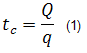

In [14]:
# Calculating Material Balance Time (tc)
df['MB tc'] = round(df['Np (STB)']/df['q (STB/D)'],1)

For conforming the **Boundary Dominated Flow**, we need to look out for $-1$ slope on the $log$ $q$ $vs$ $log$ $tc$ plot.

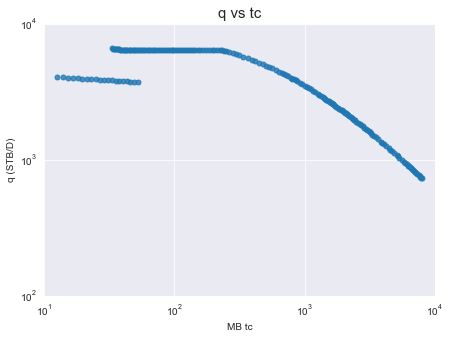

In [21]:
# Plot of log q vs log tc
sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(7, 5))
ax.set(xscale="log", yscale="log")
plt.xlim(10,10000)
plt.ylim(100,10000)
plt.title('q vs tc',{'fontsize': 15})
sns.regplot('MB tc', 'q (STB/D)', data=df, scatter_kws={"s": 25},fit_reg=False)

We can see the $-1$ slope after approx $tc = 4500$ $days$.

Lets create a new dataframe with this information.

In [22]:
# DataFrame with data for the boundary dominated flow
df_bdf = df[df['MB tc']>4500]

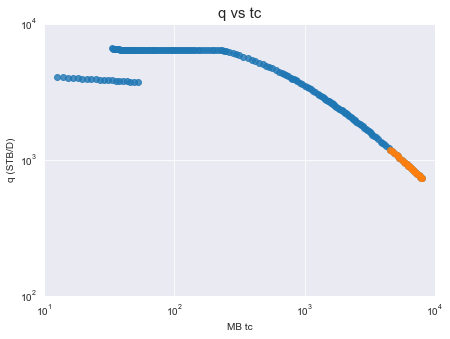

In [30]:
# Plot of log q vs log tc depitcting the -1 slope.
f, ax = plt.subplots(figsize=(7, 5))
ax.set(xscale="log", yscale="log")
plt.xlim(10,10000)
plt.ylim(100,10000)
plt.title('q vs tc',{'fontsize': 15})
sns.regplot('MB tc', 'q (STB/D)', data=df,fit_reg=False)
sns.regplot('MB tc', 'q (STB/D)', data=df_bdf,fit_reg=False)

## Type of Decline

Lets plot $log$ $q$ $vs$ $time$, to understand the type of decline.

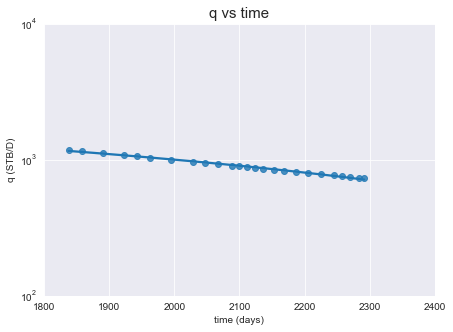

In [32]:
# Plotting log q vs time and doing a linear fit
f, ax = plt.subplots(figsize=(7, 5))
ax.set(yscale="log")
plt.xlim(1800,2400)
plt.ylim(100,10000)
plt.title('q vs time',{'fontsize': 15})
sns.regplot('time (days)', 'q (STB/D)', data=df_bdf)

We can see, from the Arps decline curve Equations that, $ln$ $q$ $vs$ $t$ is a straight line plot in case of an ***Exponential Decline***.

## Arps Decline Curve Functions
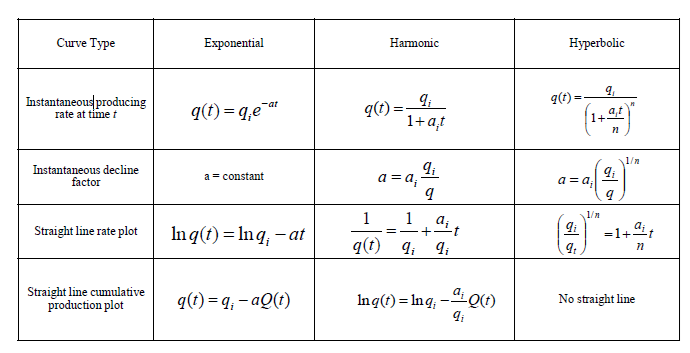

## Initial production rate $qi$ and Nominal Decline Rate $a$

As the decline is Exponential, value of $b$ $=$ $0$.

For Exponetial Decline, production rate $q$ and Cumulative Production $Np$ is related as: $q$ = $qi$ - $a$ $Np$

So lets plot $q$ $vs$ $Np$ and then using sklearn, fit a linear model to get the parameters $qi$ and $a$.

In [34]:
X = df_bdf['Np (STB)'].values.reshape(-1,1)
y = df_bdf['q (STB/D)'].values.reshape(-1,1)

In [35]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [36]:
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
print(lm.coef_[0])
print(lm.intercept_)

[-0.00107797]
[7019.31945741]


Thus, qi = 7019.3 and a = 0.0011

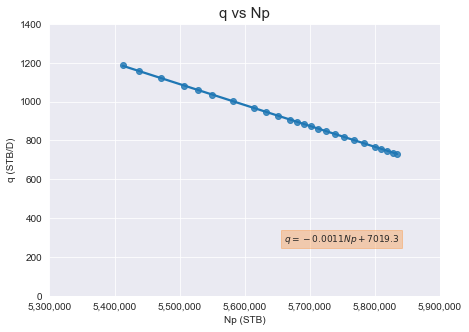

In [39]:
import matplotlib.ticker as mat
plt.figure(figsize=(7, 5))
plt.xlim(5300000,5900000)
plt.ylim(0,1400)
plt.title('q vs Np',{'fontsize': 15})
g = sns.regplot('Np (STB)', 'q (STB/D)', data=df_bdf)
props = dict(boxstyle='square', alpha=0.3,color=sns.color_palette()[1])
textstr = '$q=-0.0011Np + 7019.3$'
g.axes.text(0.6, 0.2, textstr, transform=g.axes.transAxes, fontsize=9, bbox=props)
g.axes.get_xaxis().set_major_formatter(mat.FuncFormatter(lambda x, p: format(int(x), ',')))

In [40]:
# Assigning the variables
a = 0.0011
qi = 7019.3

## Production Forecasting and calculating the well's Estimated Ultimate Recovery (EUR) for the next 3 years

In [44]:
# Creating a new DataFrame 'forecast', to store the production forecasts for next three years.
forecast = pd.DataFrame(columns=['time (days)','q (STB/D)','Np (STB)'])

In [45]:
forecast.head()

,time (days),q (STB/D),Np (STB)


In [46]:
forecast['time (days)'] = np.arange(2300,3390,10)

In [47]:
forecast.tail()

,time (days),q (STB/D),Np (STB)
104,3340,NaN,NaN
105,3350,NaN,NaN
106,3360,NaN,NaN
107,3370,NaN,NaN
108,3380,NaN,NaN


We have our data for **2292** days, so I have started the forcasting from **2300** Days untill **3390** Days (i.e 3 years after 2292 Days)

In [53]:
# Using the Arps Exponential Curve fit equations and values of qi and a
for i in range(0,109):
    forecast.iloc[i,1] = 8696*2.718**(-1.082*(10**-3)*(forecast.iloc[i,0]))

In [56]:
forecast.head()

,time (days),q (STB/D),Np (STB)
0,2300,722.181,NaN
1,2310,714.41,NaN
2,2320,706.723,NaN
3,2330,699.118,NaN
4,2340,691.595,NaN


In [76]:
# Calculating the Cumulative Production and EUR
forecast.iloc[0,2] = forecast.iloc[0,1] * (forecast.iloc[0,0] - df_bdf.iloc[24,3]) + df_bdf.iloc[24,2]

for i in range(1,109):
    forecast.iloc[i,2] = forecast.iloc[i,1]*(forecast.iloc[i,0] - forecast.iloc[i-1,0]) + forecast.iloc[i-1,2]

In [80]:
forecast.tail()

,time (days),q (STB/D),Np (STB)
104,3340,234.42,6.28848e+06
105,3350,231.897,6.2908e+06
106,3360,229.402,6.29309e+06
107,3370,226.933,6.29536e+06
108,3380,224.491,6.29761e+06


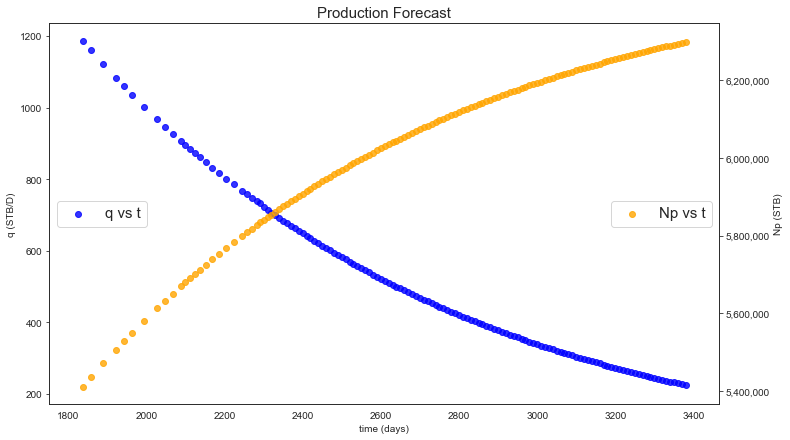

In [116]:
sns.set_style('white')
plt.figure(figsize=(12,7))
plt.title('Production Forecast',{'fontsize': 15})
ax = sns.regplot('time (days)', 'q (STB/D)', data=df_bdf,fit_reg=False, label='q vs t',color='blue')
ax = sns.regplot('time (days)', 'q (STB/D)', data=forecast,fit_reg=False, color='blue')
ax.legend(loc=6,fontsize=15)
ax2 = ax.twinx()
g = sns.regplot('time (days)', 'Np (STB)', data=df_bdf, fit_reg=False,label='Np vs t',color='orange')
g = sns.regplot('time (days)', 'Np (STB)', data=forecast,fit_reg=False, color='orange')
g.legend(loc=7,fontsize=15)
g.axes.get_yaxis().set_major_formatter(mat.FuncFormatter(lambda y, p: format(int(y), ',')))

### EUR after 3 years is 6.28 MMSTB